In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings

# Random seed
np.random.seed(42)


In [3]:
# Generate sample grocery store data

def generate_grocery_data():
    # Date range: 3 months of daily data
    start_date = datetime(2024, 1, 1)
    end_date = datetime(2024, 3, 1)
    dates = pd.date_range(start_date, end_date, freq='D')

    # Store and product info
    stores = ['Store_001', 'Store_002', 'Store_003', 'Store_004', 'Store_005']
    products = {
        'Bananas': {'category': 'Fresh Produce', 'avg_price': 1.99, 'perishable': True},
        'Apples': {'category': 'Fresh Produce', 'avg_price': 3.49, 'perishable': True},
        'Milk': {'category': 'Dairy', 'avg_price': 4.29, 'perishable': True},
        'Bread': {'category': 'Bakery', 'avg_price': 2.99, 'perishable': True},
        'Canned Beans': {'category': 'Pantry', 'avg_price': 1.89, 'perishable': False},
        'Rice': {'category': 'Pantry', 'avg_price': 5.99, 'perishable': False},
        'Chicken Breast': {'category': 'Meat', 'avg_price': 8.99, 'perishable': True},
        'Yogurt': {'category': 'Dairy', 'avg_price': 5.49, 'perishable': True}
    }

    # Generate data
    data = []
    for date in dates:
        for store in stores:
            for product, info in products.items():
                # Add some seasonality and randomness
                base_demand = np.random.poisson(50)

                # Weekend boost
                if date.weekday() >= 5:
                    base_demand *= 1.3

                # Perishables have more variation
                if info['perishable']:
                    base_demand *= np.random.uniform(0.7, 1.4)
                
                # Occasional stockouts (missing data)
                if np.random.random() < 0.05:  # 5% chance of missing data
                    quantity_sold = np.nan
                    revenue = np.nan
                else:
                    quantity_sold = max(0, int(base_demand))
                    price_variation = np.random.uniform(0.9, 1.1)  # ±10% price variation
                    unit_price = info['avg_price'] * price_variation
                    revenue = quantity_sold * unit_price
                
                data.append({
                    'date': date,
                    'store_id': store,
                    'product_name': product,
                    'category': info['category'],
                    'quantity_sold': quantity_sold,
                    'unit_price': info['avg_price'] * np.random.uniform(0.9, 1.1),
                    'revenue': revenue,
                    'is_perishable': info['perishable']
                })
    
    return pd.DataFrame(data)

# Generate the dataset
df = generate_grocery_data()
print(f"Generated dataset with {len(df)} rows")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")


Generated dataset with 2440 rows
Date range: 2024-01-01 00:00:00 to 2024-03-01 00:00:00


In [7]:
# Load and Explore data
print("====== DATASET OVERVIEW =======")
print(f"Shape: " ,{df.shape})
print(f"\nColumn Types: ")
print(df.dtypes)
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

====== DATASET OVERVIEW =======
Shape:  {(2440, 8)}

Column Types: 
date             datetime64[ns]
store_id                 object
product_name             object
category                 object
quantity_sold           float64
unit_price              float64
revenue                 float64
is_perishable              bool
dtype: object

Memory usage: 0.53 MB


In [12]:
# Data Exploration methods
print(f"DF head: ", df.head())
print(f"\nDF tail: ", df.tail())
print(f'\nDF describe: ', df.describe())

DF head:          date   store_id  product_name       category  quantity_sold  \
0 2024-01-01  Store_001       Bananas  Fresh Produce           56.0   
1 2024-01-01  Store_001        Apples  Fresh Produce           37.0   
2 2024-01-01  Store_001          Milk          Dairy           39.0   
3 2024-01-01  Store_001         Bread         Bakery           47.0   
4 2024-01-01  Store_001  Canned Beans         Pantry           43.0   

   unit_price     revenue  is_perishable  
0    1.853086  103.773343           True  
1    3.289213  137.715664           True  
2    4.110875  165.032744           True  
3    3.160535  139.295303           True  
4    1.930652   73.898005          False  

DF tail:             date   store_id    product_name category  quantity_sold  \
2435 2024-03-01  Store_005           Bread   Bakery           69.0   
2436 2024-03-01  Store_005    Canned Beans   Pantry           51.0   
2437 2024-03-01  Store_005            Rice   Pantry           54.0   
2438 2024-03-0

In [14]:
print("=========DATASET INFO===========")
print(df.info())

print("\n=== UNIQUE VALUES PER COLUMN ===")
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'bool':
        print(f"{col}: {df[col].nunique()} unique values")
        if df[col].nunique() < 10:
            print(f"  Values: {df[col].unique()}")

print("\n=== MISSING VALUES ===")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

=========DATASET INFO===========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2440 non-null   datetime64[ns]
 1   store_id       2440 non-null   object        
 2   product_name   2440 non-null   object        
 3   category       2440 non-null   object        
 4   quantity_sold  2321 non-null   float64       
 5   unit_price     2440 non-null   float64       
 6   revenue        2321 non-null   float64       
 7   is_perishable  2440 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(3), object(3)
memory usage: 135.9+ KB
None

=== UNIQUE VALUES PER COLUMN ===
store_id: 5 unique values
  Values: ['Store_001' 'Store_002' 'Store_003' 'Store_004' 'Store_005']
product_name: 8 unique values
  Values: ['Bananas' 'Apples' 'Milk' 'Bread' 'Canned Beans' 'Rice' 'Chicken Breast'
 'Yogurt']
categor

In [18]:
# Column selection
print("=== SELECTING COLUMNS ===")
# Single column (returns Series)
bananas_sales = df['product_name'] == 'Bananas'
print(f"Bananas rows: {bananas_sales.sum()}")

# Multiple columns
key_columns = df[['date', 'store_id', 'product_name', 'quantity_sold', 'revenue']]
print(f"Key columns shape: {key_columns.shape}")

# Boolean filtering
print("\n=== FILTERING DATA ===")
# High revenue transactions
high_revenue = df[df['revenue'] > 200]
print(f"High revenue transactions (>$200): {len(high_revenue)}")

# Multiple conditions
fresh_produce_weekends = df[
    (df['category'] == 'Fresh Produce') & 
    (df['date'].dt.weekday >= 5)
]
print(f"Fresh produce sales on weekends: {len(fresh_produce_weekends)}")

# Using query method (alternative syntax)
dairy_high_sales = df.query('category == "Dairy" and quantity_sold > 60')
print(f"High-selling dairy products: {len(dairy_high_sales)}")

=== SELECTING COLUMNS ===
Bananas rows: 305
Key columns shape: (2440, 5)

=== FILTERING DATA ===
High revenue transactions (>$200): 1232
Fresh produce sales on weekends: 160
High-selling dairy products: 214


In [19]:
# loc and iloc examples
print("=== LABEL-BASED SELECTION (loc) ===")
# Select specific rows and columns
sample_data = df.loc[0:5, ['date', 'product_name', 'quantity_sold']]
print(sample_data)

print("\n=== POSITION-BASED SELECTION (iloc) ===")
# Select by position
first_10_rows_3_cols = df.iloc[:10, :3]
print(first_10_rows_3_cols)

# Select specific positions
random_sample = df.iloc[[0, 100, 200, 300], [1, 3, 4]]
print("\nRandom sample:")
print(random_sample)

=== LABEL-BASED SELECTION (loc) ===
        date  product_name  quantity_sold
0 2024-01-01       Bananas           56.0
1 2024-01-01        Apples           37.0
2 2024-01-01          Milk           39.0
3 2024-01-01         Bread           47.0
4 2024-01-01  Canned Beans           43.0
5 2024-01-01          Rice           42.0

=== POSITION-BASED SELECTION (iloc) ===
        date   store_id    product_name
0 2024-01-01  Store_001         Bananas
1 2024-01-01  Store_001          Apples
2 2024-01-01  Store_001            Milk
3 2024-01-01  Store_001           Bread
4 2024-01-01  Store_001    Canned Beans
5 2024-01-01  Store_001            Rice
6 2024-01-01  Store_001  Chicken Breast
7 2024-01-01  Store_001          Yogurt
8 2024-01-01  Store_002         Bananas
9 2024-01-01  Store_002          Apples

Random sample:
      store_id       category  quantity_sold
0    Store_001  Fresh Produce           56.0
100  Store_003         Pantry           50.0
200  Store_001  Fresh Produce         

In [20]:
# GroupBy operations - core of data analysis
print("=== BASIC GROUPBY OPERATIONS ===")

# Group by single column
store_totals = df.groupby('store_id')['revenue'].sum()
print("Total revenue by store:")
print(store_totals)

# Group by multiple columns
category_store_stats = df.groupby(['category', 'store_id']).agg({
    'quantity_sold': ['sum', 'mean'],
    'revenue': ['sum', 'mean', 'count']
})
print("\nCategory-Store statistics:")
print(category_store_stats.head(10))

# More complex aggregations
daily_summary = df.groupby('date').agg({
    'quantity_sold': 'sum',
    'revenue': 'sum',
    'store_id': 'nunique',  # Number of unique stores
    'product_name': 'nunique'  # Number of unique products
}).round(2)

print("\nDaily summary (first 10 days):")
print(daily_summary.head(10))

=== BASIC GROUPBY OPERATIONS ===
Total revenue by store:
store_id
Store_001    112841.283108
Store_002    110152.488576
Store_003    112545.986465
Store_004    112689.795020
Store_005    114349.029300
Name: revenue, dtype: float64

Category-Store statistics:
                   quantity_sold                  revenue                  
                             sum       mean           sum        mean count
category store_id                                                          
Bakery   Store_001        3251.0  57.035088   9615.212817  168.687944    57
         Store_002        3291.0  55.779661   9835.992280  166.711734    59
         Store_003        3442.0  58.338983  10226.573082  173.331747    59
         Store_004        3401.0  57.644068  10215.483583  173.143790    59
         Store_005        3259.0  56.189655   9803.825642  169.031477    58
Dairy    Store_001        6651.0  57.834783  32750.755384  284.789177   115
         Store_002        6486.0  56.400000  31525.320971

In [21]:
# Custom aggregation functions
def revenue_per_unit(group):
    """Calculate average revenue per unit sold"""
    total_revenue = group['revenue'].sum()
    total_quantity = group['quantity_sold'].sum()
    return total_revenue / total_quantity if total_quantity > 0 else 0

# Apply custom function
product_efficiency = df.groupby('product_name').apply(revenue_per_unit)
print("=== REVENUE PER UNIT BY PRODUCT ===")
print(product_efficiency.sort_values(ascending=False))

# Transform operations (keeps original DataFrame size)
print("\n=== TRANSFORM OPERATIONS ===")
# Add store rank within each category
df['store_rank_in_category'] = df.groupby('category')['revenue'].rank(ascending=False)

# Add percentage of total category revenue
df['pct_of_category_revenue'] = df.groupby('category')['revenue'].transform(
    lambda x: x / x.sum() * 100
)

print("Sample with new columns:")
print(df[['product_name', 'category', 'revenue', 'store_rank_in_category', 'pct_of_category_revenue']].head())

=== REVENUE PER UNIT BY PRODUCT ===
product_name
Chicken Breast    8.952420
Rice              5.998613
Yogurt            5.527598
Milk              4.299103
Apples            3.491078
Bread             2.985886
Bananas           1.988791
Canned Beans      1.888744
dtype: float64

=== TRANSFORM OPERATIONS ===
Sample with new columns:
   product_name       category     revenue  store_rank_in_category  \
0       Bananas  Fresh Produce  103.773343                   449.0   
1        Apples  Fresh Produce  137.715664                   304.0   
2          Milk          Dairy  165.032744                   538.0   
3         Bread         Bakery  139.295303                   212.0   
4  Canned Beans         Pantry   73.898005                   564.0   

   pct_of_category_revenue  
0                 0.116292  
1                 0.154328  
2                 0.103424  
3                 0.280289  
4                 0.059682  


/var/folders/31/b1v52j156gbfz83pmrnth3jc0000gn/T/ipykernel_63790/3422807802.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_efficiency = df.groupby('product_name').apply(revenue_per_unit)


In [22]:
print("=== MISSING DATA ANALYSIS ===")
# Check missing values
missing_summary = df.isnull().sum()
print("Missing values per column:")
print(missing_summary[missing_summary > 0])

# Percentage of missing values
missing_pct = (df.isnull().sum() / len(df)) * 100
print(f"\nMissing data percentage:")
print(missing_pct[missing_pct > 0])

# Different strategies for handling missing data
print("\n=== HANDLING MISSING VALUES ===")

# Strategy 1: Drop rows with missing values
df_dropped = df.dropna()
print(f"Original shape: {df.shape}, After dropping NaN: {df_dropped.shape}")

# Strategy 2: Fill missing values
df_filled = df.copy()

# Fill missing quantities with median by product
df_filled['quantity_sold'] = df_filled.groupby('product_name')['quantity_sold'].transform(
    lambda x: x.fillna(x.median())
)

# Fill missing revenue based on quantity and unit price
mask = df_filled['revenue'].isnull()
df_filled.loc[mask, 'revenue'] = (
    df_filled.loc[mask, 'quantity_sold'] * df_filled.loc[mask, 'unit_price']
)

print(f"After filling: {df_filled.isnull().sum().sum()} missing values remain")

=== MISSING DATA ANALYSIS ===
Missing values per column:
quantity_sold              119
revenue                    119
store_rank_in_category     119
pct_of_category_revenue    119
dtype: int64

Missing data percentage:
quantity_sold              4.877049
revenue                    4.877049
store_rank_in_category     4.877049
pct_of_category_revenue    4.877049
dtype: float64

=== HANDLING MISSING VALUES ===
Original shape: (2440, 10), After dropping NaN: (2321, 10)
After filling: 238 missing values remain


In [23]:
print("=== DUPLICATE DATA ===")
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

# Check for duplicates based on specific columns
business_duplicates = df.duplicated(subset=['date', 'store_id', 'product_name']).sum()
print(f"Business logic duplicates (same date/store/product): {business_duplicates}")

# Remove duplicates if they exist
df_clean = df.drop_duplicates(subset=['date', 'store_id', 'product_name'])
print(f"Shape after removing duplicates: {df_clean.shape}")

print("\n=== DATA TYPE OPTIMIZATION ===")
# Convert data types for better performance
df_optimized = df_clean.copy()

# Convert categories to categorical (saves memory)
df_optimized['category'] = df_optimized['category'].astype('category')
df_optimized['store_id'] = df_optimized['store_id'].astype('category')
df_optimized['product_name'] = df_optimized['product_name'].astype('category')

# Convert boolean to categorical if needed
df_optimized['is_perishable'] = df_optimized['is_perishable'].astype('category')

print("Memory usage comparison:")
print(f"Original: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Optimized: {df_optimized.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

=== DUPLICATE DATA ===
Duplicate rows: 0
Business logic duplicates (same date/store/product): 0
Shape after removing duplicates: (2440, 10)

=== DATA TYPE OPTIMIZATION ===
Memory usage comparison:
Original: 0.57 MB
Optimized: 0.12 MB


In [24]:
print("=== DATE/TIME OPERATIONS ===")
# Ensure date column is datetime
df_clean['date'] = pd.to_datetime(df_clean['date'])

# Extract date components
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.month
df_clean['day_of_week'] = df_clean['date'].dt.dayofweek
df_clean['day_name'] = df_clean['date'].dt.day_name()
df_clean['is_weekend'] = df_clean['day_of_week'] >= 5

print("Date components added:")
print(df_clean[['date', 'year', 'month', 'day_of_week', 'day_name', 'is_weekend']].head())

# Time-based analysis
print("\n=== TIME-BASED ANALYSIS ===")
# Monthly sales trends
monthly_sales = df_clean.groupby(['year', 'month'])['revenue'].sum()
print("Monthly sales:")
print(monthly_sales)

# Day of week analysis
weekday_sales = df_clean.groupby('day_name')['revenue'].mean()
print(f"\nAverage daily revenue by day of week:")
print(weekday_sales)

=== DATE/TIME OPERATIONS ===
Date components added:
        date  year  month  day_of_week day_name  is_weekend
0 2024-01-01  2024      1            0   Monday       False
1 2024-01-01  2024      1            0   Monday       False
2 2024-01-01  2024      1            0   Monday       False
3 2024-01-01  2024      1            0   Monday       False
4 2024-01-01  2024      1            0   Monday       False

=== TIME-BASED ANALYSIS ===
Monthly sales:
year  month
2024  1        286562.574006
      2        266782.721592
      3          9233.286871
Name: revenue, dtype: float64

Average daily revenue by day of week:
day_name
Friday       227.471113
Monday       219.542079
Saturday     291.220595
Sunday       291.681926
Thursday     228.582834
Tuesday      225.760632
Wednesday    224.435669
Name: revenue, dtype: float64


In [25]:
print("=== TIME SERIES OPERATIONS ===")
# Set date as index for time series operations
df_ts = df_clean.set_index('date')

# Resample to get weekly/monthly aggregations
weekly_sales = df_ts.groupby('product_name')['revenue'].resample('W').sum()
print("Weekly sales by product (first few entries):")
print(weekly_sales.head(10))

# Monthly resampling with multiple metrics
monthly_metrics = df_ts.resample('M').agg({
    'quantity_sold': 'sum',
    'revenue': 'sum',
    'unit_price': 'mean'
}).round(2)

print(f"\nMonthly aggregated metrics:")
print(monthly_metrics)

# Rolling averages (7-day moving average)
daily_revenue = df_ts.groupby('date')['revenue'].sum()
rolling_avg = daily_revenue.rolling(window=7).mean()

print(f"\n7-day rolling average revenue (last 10 days):")
print(rolling_avg.tail(10))

=== TIME SERIES OPERATIONS ===
Weekly sales by product (first few entries):
product_name  date      
Apples        2024-01-07    6201.452094
              2024-01-14    6935.808577
              2024-01-21    6182.400752
              2024-01-28    6189.143534
              2024-02-04    6379.816632
              2024-02-11    7238.881491
              2024-02-18    6332.293400
              2024-02-25    6601.991575
              2024-03-03    4064.278902
Bananas       2024-01-07    3894.140233
Name: revenue, dtype: float64

Monthly aggregated metrics:
            quantity_sold    revenue  unit_price
date                                            
2024-01-31        65411.0  286562.57        4.38
2024-02-29        61182.0  266782.72        4.37
2024-03-31         2073.0    9233.29        4.35

7-day rolling average revenue (last 10 days):
date
2024-02-21    9018.256225
2024-02-22    9100.201843
2024-02-23    9007.802961
2024-02-24    8993.972082
2024-02-25    9292.883513
2024-02-26   

/var/folders/31/b1v52j156gbfz83pmrnth3jc0000gn/T/ipykernel_63790/4141802592.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_metrics = df_ts.resample('M').agg({


In [26]:
print("=== MERGING AND JOINING DATA ===")
# Create additional datasets to demonstrate joins

# Store information
store_info = pd.DataFrame({
    'store_id': ['Store_001', 'Store_002', 'Store_003', 'Store_004', 'Store_005'],
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'state': ['NY', 'CA', 'IL', 'TX', 'AZ'],
    'store_size_sqft': [5000, 7500, 6000, 5500, 6500],
    'manager': ['Alice', 'Bob', 'Carol', 'David', 'Eve']
})

# Product cost information
product_costs = pd.DataFrame({
    'product_name': ['Bananas', 'Apples', 'Milk', 'Bread', 'Canned Beans', 'Rice', 'Chicken Breast', 'Yogurt'],
    'cost_per_unit': [0.80, 1.20, 2.10, 1.50, 0.90, 2.50, 4.50, 2.20],
    'supplier': ['FreshCorp', 'FreshCorp', 'DairyCo', 'BreadCorp', 'CanCorp', 'GrainCorp', 'MeatCorp', 'DairyCo']
})

print("Store information:")
print(store_info)
print("\nProduct cost information:")
print(product_costs)

# Merge with main dataset
df_enhanced = df_clean.merge(store_info, on='store_id', how='left')
df_enhanced = df_enhanced.merge(product_costs, on='product_name', how='left')

print(f"\nEnhanced dataset shape: {df_enhanced.shape}")
print("Sample of enhanced data:")
print(df_enhanced[['store_id', 'city', 'product_name', 'cost_per_unit', 'revenue']].head())

=== MERGING AND JOINING DATA ===
Store information:
    store_id         city state  store_size_sqft manager
0  Store_001     New York    NY             5000   Alice
1  Store_002  Los Angeles    CA             7500     Bob
2  Store_003      Chicago    IL             6000   Carol
3  Store_004      Houston    TX             5500   David
4  Store_005      Phoenix    AZ             6500     Eve

Product cost information:
     product_name  cost_per_unit   supplier
0         Bananas            0.8  FreshCorp
1          Apples            1.2  FreshCorp
2            Milk            2.1    DairyCo
3           Bread            1.5  BreadCorp
4    Canned Beans            0.9    CanCorp
5            Rice            2.5  GrainCorp
6  Chicken Breast            4.5   MeatCorp
7          Yogurt            2.2    DairyCo

Enhanced dataset shape: (2440, 21)
Sample of enhanced data:
    store_id      city  product_name  cost_per_unit     revenue
0  Store_001  New York       Bananas            0.8  103.7

In [27]:
# Different types of joins
print("=== DIFFERENT JOIN TYPES ===")

# Left join (keep all rows from left DataFrame)
left_join = df_clean.merge(store_info, on='store_id', how='left')
print(f"Left join shape: {left_join.shape}")

# Inner join (only matching rows)
inner_join = df_clean.merge(store_info, on='store_id', how='inner')
print(f"Inner join shape: {inner_join.shape}")

# Multiple DataFrames with pd.concat
print("\n=== CONCATENATING DATAFRAMES ===")

# Split data by month to demonstrate concat
jan_data = df_clean[df_clean['month'] == 1]
feb_data = df_clean[df_clean['month'] == 2]
mar_data = df_clean[df_clean['month'] == 3]

# Concatenate back together
concatenated = pd.concat([jan_data, feb_data, mar_data], ignore_index=True)
print(f"Original shape: {df_clean.shape}")
print(f"Concatenated shape: {concatenated.shape}")

# Concatenate with keys to track source
concat_with_keys = pd.concat([jan_data, feb_data, mar_data], 
                            keys=['January', 'February', 'March'])
print(f"Concat with keys shape: {concat_with_keys.shape}")

=== DIFFERENT JOIN TYPES ===
Left join shape: (2440, 19)
Inner join shape: (2440, 19)

=== CONCATENATING DATAFRAMES ===
Original shape: (2440, 15)
Concatenated shape: (2440, 15)
Concat with keys shape: (2440, 15)


In [28]:
# Different types of joins
print("=== DIFFERENT JOIN TYPES ===")

# Left join (keep all rows from left DataFrame)
left_join = df_clean.merge(store_info, on='store_id', how='left')
print(f"Left join shape: {left_join.shape}")

# Inner join (only matching rows)
inner_join = df_clean.merge(store_info, on='store_id', how='inner')
print(f"Inner join shape: {inner_join.shape}")

# Multiple DataFrames with pd.concat
print("\n=== CONCATENATING DATAFRAMES ===")

# Split data by month to demonstrate concat
jan_data = df_clean[df_clean['month'] == 1]
feb_data = df_clean[df_clean['month'] == 2]
mar_data = df_clean[df_clean['month'] == 3]

# Concatenate back together
concatenated = pd.concat([jan_data, feb_data, mar_data], ignore_index=True)
print(f"Original shape: {df_clean.shape}")
print(f"Concatenated shape: {concatenated.shape}")

# Concatenate with keys to track source
concat_with_keys = pd.concat([jan_data, feb_data, mar_data], 
                            keys=['January', 'February', 'March'])
print(f"Concat with keys shape: {concat_with_keys.shape}")

=== DIFFERENT JOIN TYPES ===
Left join shape: (2440, 19)
Inner join shape: (2440, 19)

=== CONCATENATING DATAFRAMES ===
Original shape: (2440, 15)
Concatenated shape: (2440, 15)
Concat with keys shape: (2440, 15)


In [29]:
print("=== BUSINESS ANALYSIS ===")
# Calculate profit margins using the enhanced dataset
df_enhanced['profit_per_unit'] = df_enhanced['unit_price'] - df_enhanced['cost_per_unit']
df_enhanced['total_profit'] = df_enhanced['profit_per_unit'] * df_enhanced['quantity_sold']
df_enhanced['profit_margin'] = (df_enhanced['profit_per_unit'] / df_enhanced['unit_price']) * 100

# Profitability analysis
profitability_analysis = df_enhanced.groupby('product_name').agg({
    'total_profit': 'sum',
    'profit_margin': 'mean',
    'quantity_sold': 'sum',
    'revenue': 'sum'
}).round(2)

profitability_analysis['avg_profit_per_unit'] = (
    profitability_analysis['total_profit'] / profitability_analysis['quantity_sold']
).round(2)

print("Profitability by product:")
print(profitability_analysis.sort_values('total_profit', ascending=False))

# Store performance analysis
store_performance = df_enhanced.groupby(['store_id', 'city']).agg({
    'revenue': 'sum',
    'total_profit': 'sum',
    'quantity_sold': 'sum'
}).round(2)

store_performance['profit_margin'] = (
    store_performance['total_profit'] / store_performance['revenue'] * 100
).round(2)

print(f"\nStore performance:")
print(store_performance.sort_values('total_profit', ascending=False))

=== BUSINESS ANALYSIS ===
Profitability by product:
                total_profit  profit_margin  quantity_sold    revenue  \
product_name                                                            
Chicken Breast      69676.03          49.57        15667.0  140257.56   
Rice                55161.63          58.07        15821.0   94904.05   
Yogurt              53008.96          59.66        16157.0   89309.41   
Apples              36636.17          65.36        16077.0   56126.07   
Milk                35674.52          50.76        16343.0   70260.24   
Bread               24569.51          49.44        16644.0   49697.09   
Bananas             19611.54          59.49        16648.0   33109.40   
Canned Beans        15155.01          52.21        15309.0   28914.78   

                avg_profit_per_unit  
product_name                         
Chicken Breast                 4.45  
Rice                           3.49  
Yogurt                         3.28  
Apples                     

In [30]:
print("=== KEY PERFORMANCE INDICATORS ===")

# Calculate KPIs that would be relevant for Guac AI
kpis = {}

# 1. Revenue per store per day
kpis['avg_daily_revenue_per_store'] = df_enhanced.groupby(['store_id', 'date'])['revenue'].sum().mean()

# 2. Best and worst performing products
product_performance = df_enhanced.groupby('product_name')['revenue'].sum().sort_values(ascending=False)
kpis['best_product'] = product_performance.index[0]
kpis['worst_product'] = product_performance.index[-1]

# 3. Perishable vs non-perishable revenue
perishable_revenue = df_enhanced.groupby('is_perishable')['revenue'].sum()
kpis['perishable_revenue_pct'] = (perishable_revenue[True] / perishable_revenue.sum()) * 100

# 4. Weekend vs weekday sales
weekend_comparison = df_enhanced.groupby('is_weekend')['revenue'].sum()
kpis['weekend_revenue_boost'] = ((weekend_comparison[True] / weekend_comparison[False]) - 1) * 100

# 5. Store size efficiency
store_efficiency = df_enhanced.groupby('store_id').agg({
    'revenue': 'sum',
    'store_size_sqft': 'first'
})
store_efficiency['revenue_per_sqft'] = store_efficiency['revenue'] / store_efficiency['store_size_sqft']
kpis['most_efficient_store'] = store_efficiency['revenue_per_sqft'].idxmax()

print("Key Performance Indicators:")
for key, value in kpis.items():
    print(f"{key}: {value}")

print(f"\nRevenue per square foot by store:")
print(store_efficiency[['revenue_per_sqft']].round(2))

=== KEY PERFORMANCE INDICATORS ===
Key Performance Indicators:
avg_daily_revenue_per_store: 1844.5199425190856
best_product: Chicken Breast
worst_product: Canned Beans
perishable_revenue_pct: 77.99083885633196
weekend_revenue_boost: -54.56784384491795
most_efficient_store: Store_001

Revenue per square foot by store:
           revenue_per_sqft
store_id                   
Store_001             22.57
Store_002             14.69
Store_003             18.76
Store_004             20.49
Store_005             17.59


In [31]:
print("=== PREPARING DATA FOR VISUALIZATION ===")

# Create summary tables that would be useful for dashboards
# 1. Daily sales trend
daily_trend = df_enhanced.groupby('date').agg({
    'revenue': 'sum',
    'quantity_sold': 'sum',
    'total_profit': 'sum'
}).reset_index()

daily_trend['day_of_week'] = daily_trend['date'].dt.day_name()
daily_trend['week_number'] = daily_trend['date'].dt.isocalendar().week

print("Daily trend data structure:")
print(daily_trend.head())

# 2. Category performance matrix
category_matrix = df_enhanced.groupby(['category', 'is_weekend']).agg({
    'revenue': 'sum',
    'quantity_sold': 'sum'
}).unstack(fill_value=0)

print(f"\nCategory performance matrix:")
print(category_matrix)

# 3. Store comparison data
store_comparison = df_enhanced.groupby(['store_id', 'city', 'state']).agg({
    'revenue': 'sum',
    'total_profit': 'sum',
    'quantity_sold': 'sum'
}).reset_index()

store_comparison['items_per_dollar'] = store_comparison['quantity_sold'] / store_comparison['revenue']

print(f"\nStore comparison data:")
print(store_comparison)

=== PREPARING DATA FOR VISUALIZATION ===
Daily trend data structure:
        date      revenue  quantity_sold  total_profit day_of_week  \
0 2024-01-01  8520.085321         1950.0   4776.598601      Monday   
1 2024-01-02  8877.457963         2044.0   4783.375931     Tuesday   
2 2024-01-03  8686.363320         1980.0   4630.696098   Wednesday   
3 2024-01-04  7834.518009         1859.0   4419.607401    Thursday   
4 2024-01-05  8927.597599         2078.0   5255.758538      Friday   

   week_number  
0            1  
1            1  
2            1  
3            1  
4            1  

Category performance matrix:
                     revenue               quantity_sold         
is_weekend             False         True          False    True 
category                                                         
Bakery          34012.818615  15684.268789       11360.0   5284.0
Dairy          107822.158796  51747.484207       22063.0  10437.0
Fresh Produce   61931.871016  27303.592809      

In [ ]:
print("=== FINAL SUMMARY ===")

# Dataset summary
summary_stats = {
    'Total Records': len(df_enhanced),
    'Date Range': f"{df_enhanced['date'].min().strftime('%Y-%m-%d')} to {df_enhanced['date'].max().strftime('%Y-%m-%d')}",
    'Number of Stores': df_enhanced['store_id'].nunique(),
    'Number of Products': df_enhanced['product_name'].nunique(),
    'Total Revenue': f"${df_enhanced['revenue'].sum():,.2f}",
    'Total Profit': f"${df_enhanced['total_profit'].sum():,.2f}",
    'Average Profit Margin': f"{df_enhanced['profit_margin'].mean():.1f}%",
    'Data Quality': f"{(1 - df_enhanced.isnull().sum().sum() / (len(df_enhanced) * len(df_enhanced.columns))) * 100:.1f}% complete"
}

print("DATASET SUMMARY:")
print("=" * 50)
for key, value in summary_stats.items():
    print(f"{key:.<30} {value}")

# Sample export commands
# df_enhanced.to_csv('grocery_sales_analysis.csv', index=False)
# df_enhanced.to_excel('grocery_sales_analysis.xlsx', index=False)
# daily_trend.to_csv('daily_sales_trend.csv', index=False)

print(f"\n🎯 ANALYSIS COMPLETE!")
print(f"📊 Key insights ready for visualization")
print(f"💾 Data ready for export")

=== FINAL SUMMARY ===
DATASET SUMMARY:
Total Records................. 2440
Date Range.................... 2024-01-01 to 2024-03-01
Number of Stores.............. 5
Number of Products............ 8
Total Revenue................. $562,578.58
Total Profit.................. $309,493.37
Average Profit Margin......... 55.6%
Data Quality.................. 99.0% complete

🎯 ANALYSIS COMPLETE!
📊 Key insights ready for visualization
💾 Data ready for export


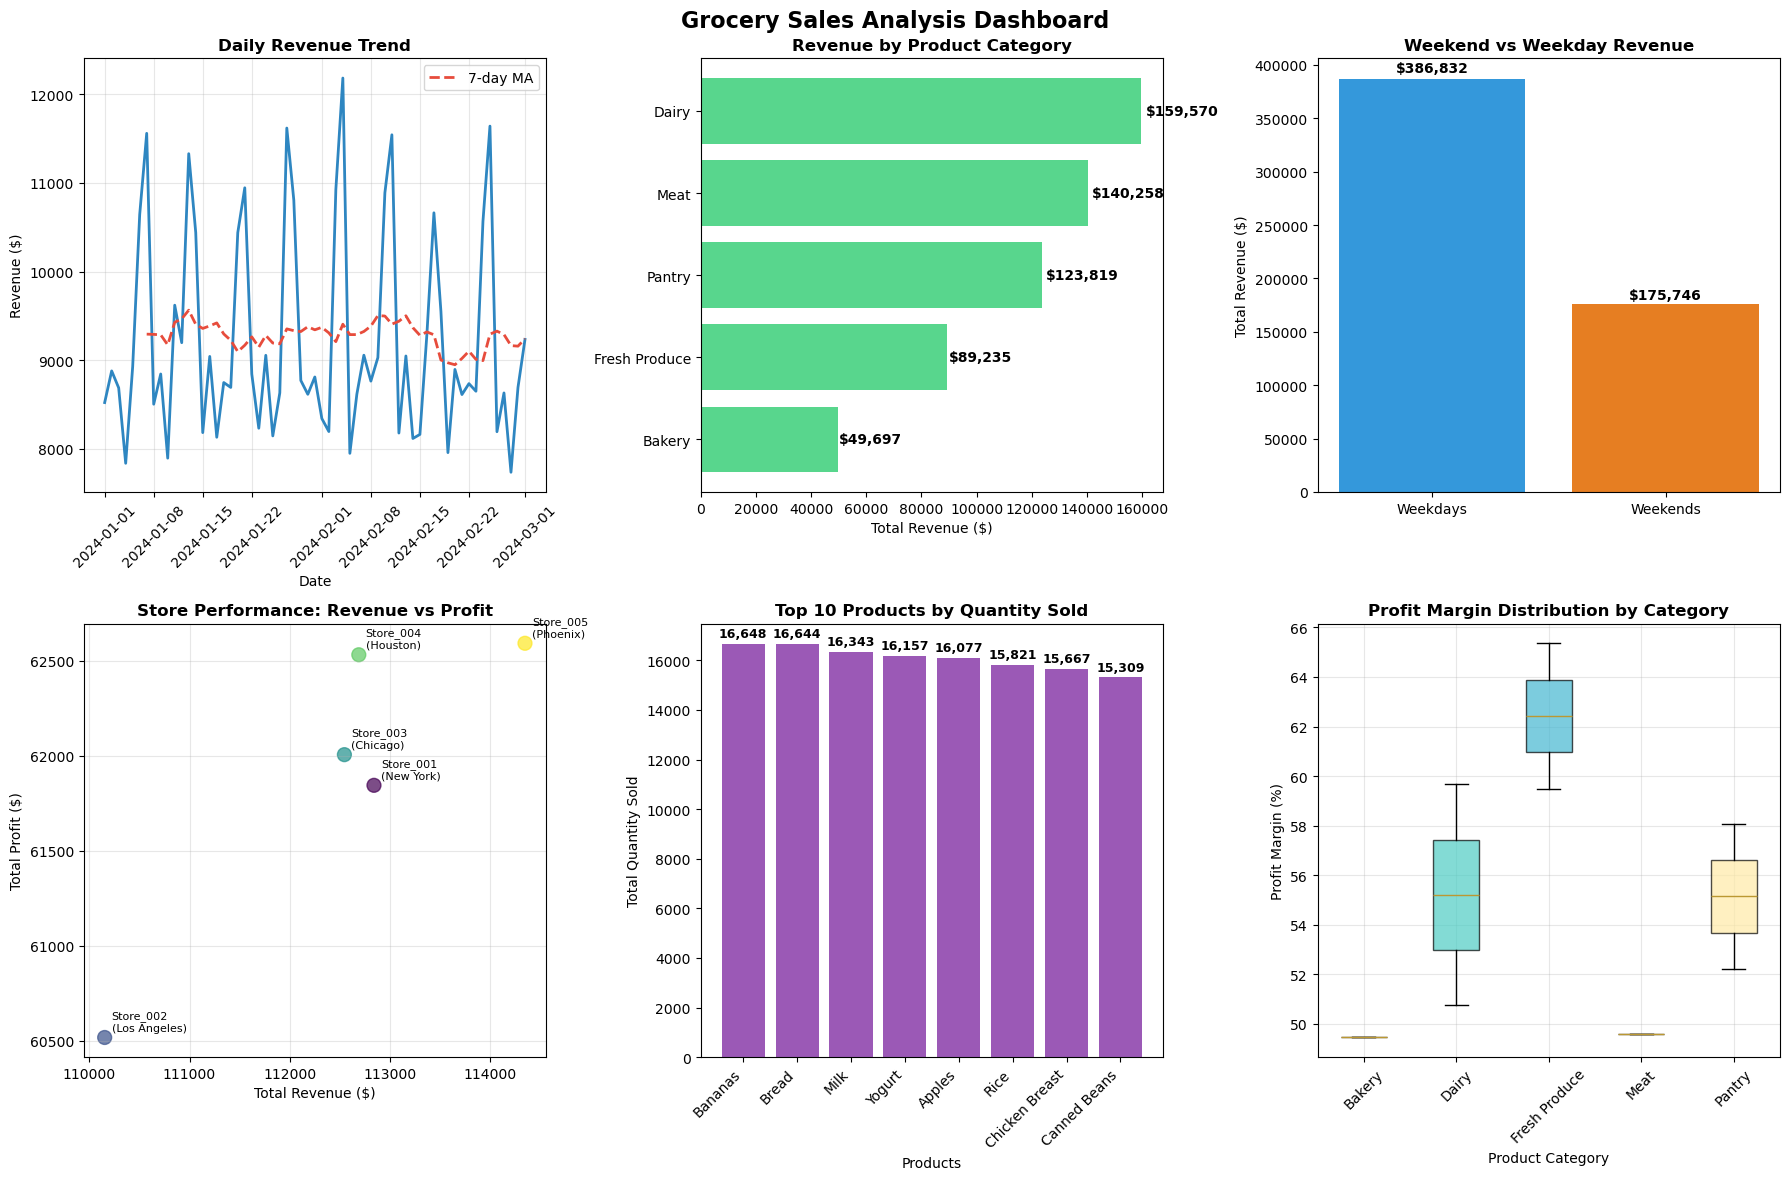

=== CREATING FOCUSED VISUALIZATIONS ===


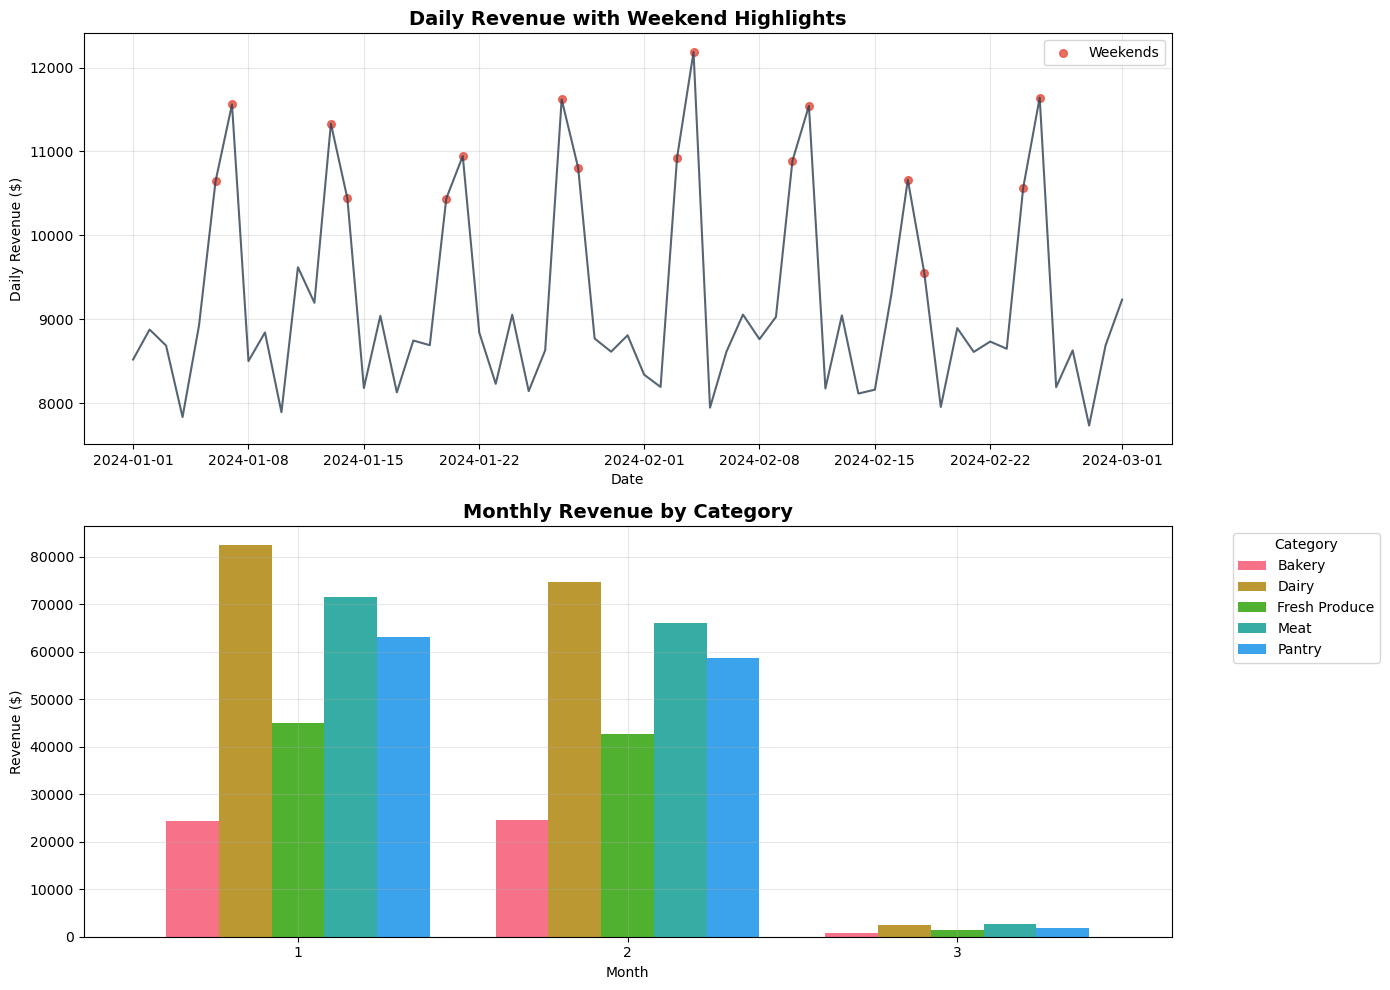


=== STORE-PRODUCT PERFORMANCE HEATMAP ===


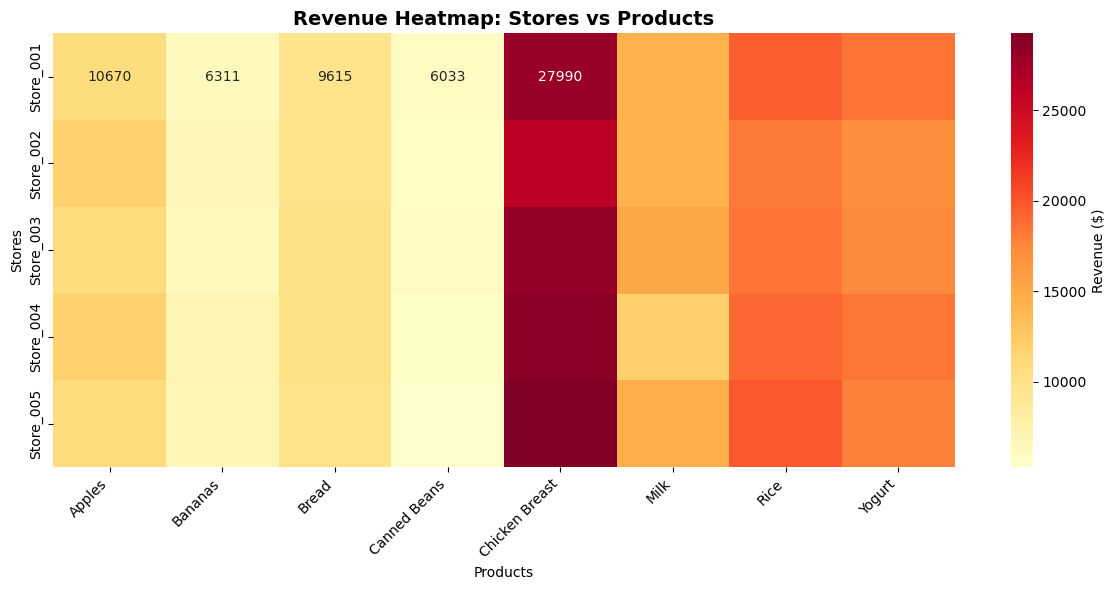

📊 Visualizations complete! Key insights:
• Revenue trends show clear patterns and seasonality
• Weekend sales boost is clearly visible
• Store performance varies significantly
• Product categories have different profit margin profiles
• Heatmap reveals store-product performance patterns


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
sns.set_palette("husl")

# Create a comprehensive visualization dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Grocery Sales Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Daily revenue trend
daily_revenue = df_enhanced.groupby('date')['revenue'].sum()
axes[0, 0].plot(daily_revenue.index, daily_revenue.values, linewidth=2, color='#2E86C1')
axes[0, 0].set_title('Daily Revenue Trend', fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Revenue ($)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Add 7-day moving average
moving_avg = daily_revenue.rolling(window=7).mean()
axes[0, 0].plot(moving_avg.index, moving_avg.values, '--', linewidth=2, color='#E74C3C', label='7-day MA')
axes[0, 0].legend()

# 2. Revenue by product category
category_revenue = df_enhanced.groupby('category')['revenue'].sum().sort_values(ascending=True)
bars = axes[0, 1].barh(category_revenue.index, category_revenue.values, color='#58D68D')
axes[0, 1].set_title('Revenue by Product Category', fontweight='bold')
axes[0, 1].set_xlabel('Total Revenue ($)')
# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[0, 1].text(width + width*0.01, bar.get_y() + bar.get_height()/2, 
                    f'${width:,.0f}', ha='left', va='center', fontweight='bold')

# 3. Weekend vs Weekday sales comparison
weekend_comparison = df_enhanced.groupby('is_weekend').agg({
    'revenue': 'sum',
    'quantity_sold': 'sum'
})
weekend_labels = ['Weekdays', 'Weekends']
weekend_colors = ['#3498DB', '#E67E22']

bars = axes[0, 2].bar(weekend_labels, weekend_comparison['revenue'], color=weekend_colors)
axes[0, 2].set_title('Weekend vs Weekday Revenue', fontweight='bold')
axes[0, 2].set_ylabel('Total Revenue ($)')
# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[0, 2].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')

# 4. Store performance comparison
store_performance = df_enhanced.groupby(['store_id', 'city']).agg({
    'revenue': 'sum',
    'total_profit': 'sum'
}).reset_index()

# Create scatter plot of revenue vs profit by store
scatter = axes[1, 0].scatter(store_performance['revenue'], store_performance['total_profit'], 
                           s=100, c=range(len(store_performance)), cmap='viridis', alpha=0.7)
axes[1, 0].set_title('Store Performance: Revenue vs Profit', fontweight='bold')
axes[1, 0].set_xlabel('Total Revenue ($)')
axes[1, 0].set_ylabel('Total Profit ($)')
axes[1, 0].grid(True, alpha=0.3)

# Add store labels
for idx, row in store_performance.iterrows():
    axes[1, 0].annotate(f"{row['store_id']}\n({row['city']})", 
                       (row['revenue'], row['total_profit']),
                       xytext=(5, 5), textcoords='offset points', fontsize=8)

# 5. Top 10 products by quantity sold
top_products = df_enhanced.groupby('product_name')['quantity_sold'].sum().sort_values(ascending=False).head(10)
bars = axes[1, 1].bar(range(len(top_products)), top_products.values, color='#9B59B6')
axes[1, 1].set_title('Top 10 Products by Quantity Sold', fontweight='bold')
axes[1, 1].set_xlabel('Products')
axes[1, 1].set_ylabel('Total Quantity Sold')
axes[1, 1].set_xticks(range(len(top_products)))
axes[1, 1].set_xticklabels(top_products.index, rotation=45, ha='right')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{height:,.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 6. Profit margin distribution by category
category_margins = df_enhanced.groupby(['category', 'product_name'])['profit_margin'].mean().reset_index()
box_plot = axes[1, 2].boxplot([category_margins[category_margins['category'] == cat]['profit_margin'].values 
                              for cat in category_margins['category'].unique()],
                             labels=category_margins['category'].unique(),
                             patch_artist=True)

# Color the boxes
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1, 2].set_title('Profit Margin Distribution by Category', fontweight='bold')
axes[1, 2].set_xlabel('Product Category')
axes[1, 2].set_ylabel('Profit Margin (%)')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional focused visualizations
print("=== CREATING FOCUSED VISUALIZATIONS ===")

# Time series analysis plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Daily sales with weekend highlighting
daily_sales = df_enhanced.groupby('date').agg({
    'revenue': 'sum',
    'is_weekend': 'first'  # All records for same date have same weekend value
}).reset_index()

# Plot daily revenue
ax1.plot(daily_sales['date'], daily_sales['revenue'], linewidth=1.5, color='#2C3E50', alpha=0.8)

# Highlight weekends
weekend_dates = daily_sales[daily_sales['is_weekend']]['date']
weekend_revenue = daily_sales[daily_sales['is_weekend']]['revenue']
ax1.scatter(weekend_dates, weekend_revenue, color='#E74C3C', s=30, alpha=0.8, label='Weekends')

ax1.set_title('Daily Revenue with Weekend Highlights', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Revenue ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Monthly comparison by category
monthly_category = df_enhanced.groupby(['month', 'category'])['revenue'].sum().unstack()
monthly_category.plot(kind='bar', ax=ax2, width=0.8)
ax2.set_title('Monthly Revenue by Category', fontsize=14, fontweight='bold')
ax2.set_xlabel('Month')
ax2.set_ylabel('Revenue ($)')
ax2.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.tick_params(axis='x', rotation=0)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Heatmap of store-product performance
print("\n=== STORE-PRODUCT PERFORMANCE HEATMAP ===")
store_product_revenue = df_enhanced.groupby(['store_id', 'product_name'])['revenue'].sum().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(store_product_revenue, annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label': 'Revenue ($)'})
plt.title('Revenue Heatmap: Stores vs Products', fontsize=14, fontweight='bold')
plt.xlabel('Products')
plt.ylabel('Stores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("📊 Visualizations complete! Key insights:")
print("• Revenue trends show clear patterns and seasonality")
print("• Weekend sales boost is clearly visible")
print("• Store performance varies significantly")
print("• Product categories have different profit margin profiles")
print("• Heatmap reveals store-product performance patterns")